<a href="https://colab.research.google.com/github/keval47/Machine-Learning/blob/master/multiclass_classification_using_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [0]:
data = datasets.load_iris()
df = pd.DataFrame(data.data,columns=['sepalL','sepalW','petalL','petalW'])
df['type'] = data.target
# - Iris-Setosa

# - Iris-Versicolour
# - Iris-Virginica

In [0]:
#sb.heatmap(df.corr(),annot=True)

In [0]:
X = np.array(df.drop(['type'],axis=1))
Y = np.array(df['type'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

In [0]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [0]:
ones = np.ones((X_train.shape[0],1),dtype=int)
X_train = np.concatenate((ones,X_train),axis=1)

In [0]:
def gradient_decent(x,y,theta,alpha,epochs,cats):
  m = x.shape[0]
  n = x.shape[1]
  err = [[],[],[]]
  for i in range(len(cats)):
    newY = np.array(y,copy=True)
    newY[y == i] = 1
    newY[y != i] = 0
    for j in range(epochs):
      theta[i] = gradient_step(x,newY,theta[i],alpha,m)
      err[i].append(cost_function(x,newY,theta[i]))
  return err,theta

In [0]:
def gradient_step(x,y,w,lr,m):
  h = sigmoid(np.dot(x,w))
  pred = h - y
  deriv = np.sum((pred[:,None]*x),axis=0)
  w -= (lr*(1/m))*deriv
  return w

In [0]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [0]:
def cost_function(x,y,w):
  h = sigmoid(np.dot(x,w))
  h = np.sum( (y*np.log(h)) + ((1-y)*np.log(1-h)) )
  return -(h / len(y))

In [0]:
# hyper  parameters
theta = np.zeros((3,X_train.shape[1]))
lr = 0.1
iters = 1000
err , theta = gradient_decent(X_train,y_train,theta,lr,iters,[0,1,2])

[[-2.45297459 -1.0849767   1.60149808 -2.03401637 -1.79983825]
 [-0.89385656  0.1733346  -1.25567218  0.62081815 -0.95145301]
 [-2.88360631  0.17554962 -0.34242325  2.38015325  3.24270195]]


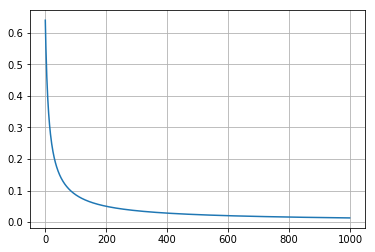

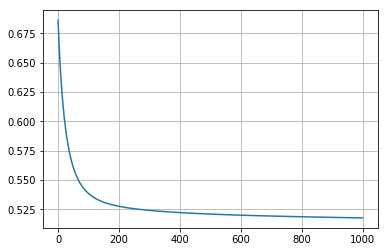

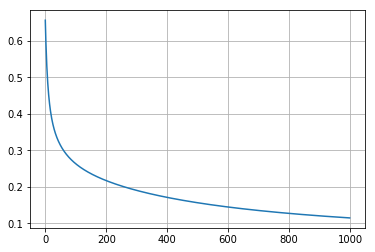

In [103]:
print(theta)
for i in err:
  plt.grid()
  plt.plot(i)
  plt.show()

In [0]:
def bulk_predict(x,w):
  predBit = np.zeros(len(x),dtype=int)
  predPr = np.zeros((len(x),len(w)))
  for i in range(len(x)):
    bit = x[i]
    bit = scaler.transform([bit])
    bit = np.insert(bit,0,1)
    for j in range(len(theta)):
      p = sigmoid(np.sum(bit*w[j]))
      predPr[i][j] = round(p, 2)*100
    predBit[i] = predPr[i].argmax()
  return predBit,predPr

In [105]:
predBit,predPr  = bulk_predict(X_test,theta)
# - Iris-Setosa
# - Iris-Versicolour
# - Iris-Virginica
predBit

array([2, 2, 2, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2,
       2])

In [106]:
metrics.accuracy_score(predBit,y_test) *100

91.11111111111111

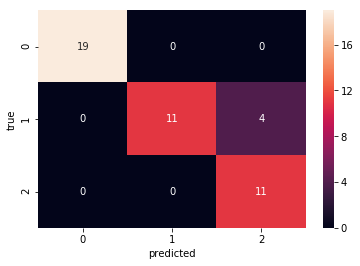

In [110]:
sb.heatmap(metrics.confusion_matrix(y_test,predBit),annot=True)
plt.ylabel('true')
plt.xlabel('predicted')
plt.show()